*Verified by Leila Belabbassi (to work with Pangeo), July 12, 2018*

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.dates as dates
import pickle as pk

In [2]:
with open('data/bottom_pressure.pd', 'rb') as f:
    botpt_data = pk.load(f)

time = list(botpt_data.index.values)
pressure = list(botpt_data['bottom_pressure'].values)

time_int = []
time = list(pd.to_datetime(botpt_data.index.values))
for i in time:
    i = np.datetime64(i).astype(datetime.datetime)
    time_int.append(dates.date2num(i))

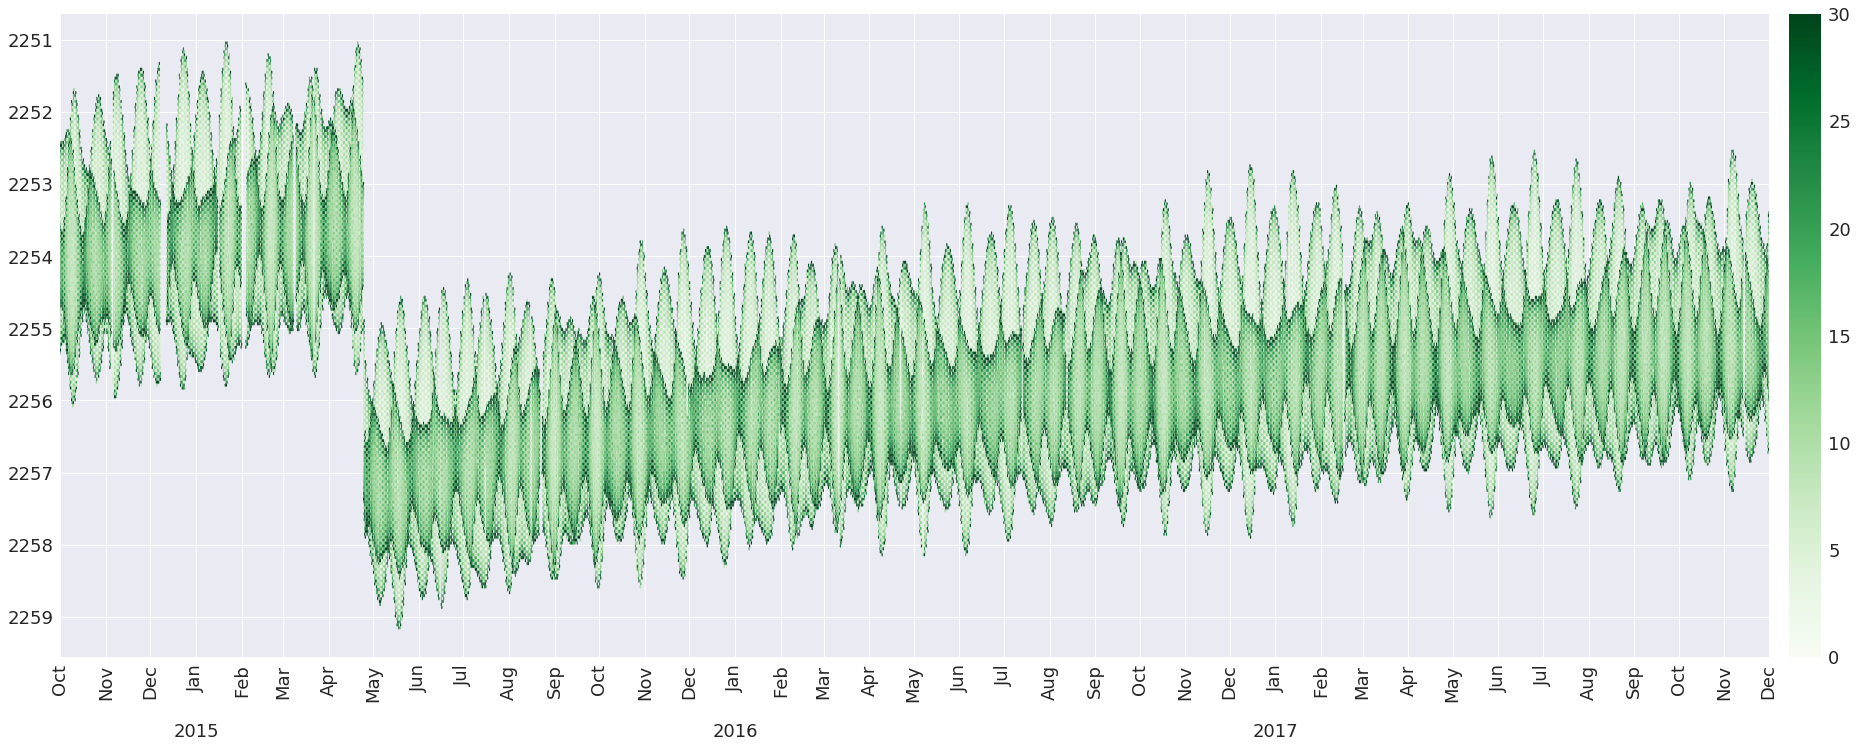

In [24]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(29, 10)
hb1 = ax.hexbin(time_int, pressure, vmin=0, vmax=30, gridsize=(1500,100), mincnt=1, cmap='Greens', linewidths=0)
cbar = fig.colorbar(hb1, pad = 0.01)
cbar.ax.tick_params(labelsize = 18)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xlim(datetime.datetime(2014, 10, 1, 0, 0),datetime.datetime(2017, 12, 1, 0, 0))
years = dates.YearLocator()
months = dates.MonthLocator()
yearsFmt = dates.DateFormatter('\n\n\n%Y')
monthsFmt = dates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(yearsFmt)
plt.tight_layout()
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, size = 18)
plt.setp(ax.xaxis.get_minorticklabels(), size = 18)
plt.setp(ax.yaxis.get_majorticklabels(), size = 18)

plt.gca().invert_yaxis()
plt.show()